# 2012欧洲杯数据 - 数据过滤与排序

![](https://github.com/tim530712345/20210626/blob/main/images/2.jpeg?raw=1)

In [17]:
import pandas as pd

### 1. 导入数据

In [18]:
euro12=pd.read_csv('Euro2012_stats.csv')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,1076,828,76.9%,1706,60,42,14,49,83,56,NaN,0,10,3,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,1565,1223,78.1%,2358,46,68,21,62,98,37,2.0,1,10,6,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,1298,1082,83.3%,1873,43,32,16,40,61,59,0.0,1,10,5,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,3,1488,1200,80.6%,2440,58,60,16,86,106,72,1.0,2,29,3,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,0,2066,1803,87.2%,2909,55,76,28,71,76,58,0.0,1,7,5,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,2774,2427,87.4%,3761,101,60,35,91,73,69,0.0,1,11,6,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,0,1187,911,76.7%,2016,52,53,10,65,123,87,0.0,1,23,7,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,2,3016,2531,83.9%,4363,75,75,30,98,137,136,1.0,2,18,7,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,0,1556,1381,88.7%,2163,50,49,22,34,41,41,0.0,0,9,5,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,1,1059,852,80.4%,1724,55,39,14,67,87,62,0.0,0,8,3,6,66.7%,48,56,3,7,1,7,7,17


### 该数组集中有多少列？

In [19]:
euro12.info()
# len(euro12.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

### 将数据集中的列Team, Yellow Cards和Red Cards单独存为一个名叫discipline的DataFrame

In [20]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline.head(3)

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0


### 红黄牌最多的球队排序

In [21]:
discipline.sort_values(['Red Cards'], ascending=False).head(10)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
7,Italy,16,0


### 计算每个球队拿到的黄牌数的平均值

In [22]:
discipline['Yellow Cards'].mean()

7.4375

### 找到进球数Goals超过6个的球队数据

In [23]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,2774,2427,87.4%,3761,101,60,35,91,73,69,0.0,1,11,6,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,2,4317,3820,88.4%,5585,69,106,44,122,102,79,0.0,5,8,1,15,93.8%,102,83,19,11,0,17,17,18


### 选取以字母G开头的球队数据

In [24]:
# euro12[euro12['Team'].str[0] == 'G']
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,2774,2427,87.4%,3761,101,60,35,91,73,69,0.0,1,11,6,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,0,1187,911,76.7%,2016,52,53,10,65,123,87,0.0,1,23,7,13,65.1%,67,48,12,9,1,12,12,20


### 选取前7列

In [25]:
euro12.iloc[:, :7] # 列 欄

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


### 选取除了最后3列之外的全部列

In [26]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,1076,828,76.9%,1706,60,42,14,49,83,56,NaN,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,1565,1223,78.1%,2358,46,68,21,62,98,37,2.0,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,1298,1082,83.3%,1873,43,32,16,40,61,59,0.0,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,3,1488,1200,80.6%,2440,58,60,16,86,106,72,1.0,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,0,2066,1803,87.2%,2909,55,76,28,71,76,58,0.0,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,2774,2427,87.4%,3761,101,60,35,91,73,69,0.0,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,0,1187,911,76.7%,2016,52,53,10,65,123,87,0.0,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,2,3016,2531,83.9%,4363,75,75,30,98,137,136,1.0,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,0,1556,1381,88.7%,2163,50,49,22,34,41,41,0.0,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,1,1059,852,80.4%,1724,55,39,14,67,87,62,0.0,0,8,3,6,66.7%,48,56,3,7,1


### 找到英格兰(England)、意大利(Italy)和俄罗斯(Russia)的射正率(Shooting Accuracy)

In [27]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Shooting Accuracy']]

,Shooting Accuracy
3,50.0%
7,43.0%
12,22.5%


### 求所有球队的进球总数(Goals)和失球总数(Goals conceded)

In [28]:
goals = euro12['Goals'].sum()
goals_conceded = euro12['Goals conceded'].sum()
print ('进球数:', goals)
print ('失球数:', goals_conceded)

进球数: 76
失球数: 76


### 对球队的进球数进行排序

In [29]:
euro12[['Team', 'Goals', 'Goals conceded']].sort_values(['Goals'], ascending=False)

,Team,Goals,Goals conceded
13,Spain,12,1
5,Germany,10,6
7,Italy,6,7
10,Portugal,6,4
3,England,5,3
6,Greece,5,7
12,Russia,5,3
14,Sweden,5,5
0,Croatia,4,3
1,Czech Republic,4,6


# 畫圖表

In [32]:
import matplotlib.pyplot as plt

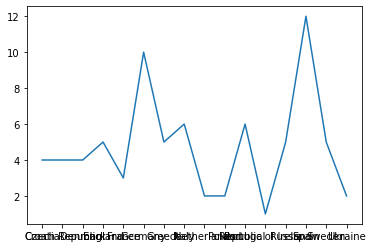

In [34]:
plt.plot(euro12['Team'], euro12['Goals'])